# British Airways Predicting Customer Behaviours

### Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [162]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
#web scraping
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [165]:
#make dataframe
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [166]:
df.to_csv("data/BA_reviews2.csv")

### Data Exploration

In [167]:
data_ba = pd.read_csv('data/BA_reviews2.csv', index_col=[0])

In [168]:
data_ba.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [169]:
data_ba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


In [170]:
#copy data 
data1 = data_ba.copy()

In [171]:
data1.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [172]:
data1.isna().any()

reviews    False
dtype: bool

In [173]:
data1.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [174]:
!pip install textblob

In [175]:
from textblob import TextBlob

In [177]:
data2 = data_ba.copy()

In [178]:
data2.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [179]:
data2['reviews'][1]

'Not Verified | It seems that there is a race to the bottom amongst airlines. I cannot even check in because BA requires the submission of documents for Covid restrictions. However the form to start the submission process is hopelessly broken. After clicking "submit" the form just hangs forever. No error message is given. I tried three different browsers on three different devices. All have the same hang. Which means you cannot check in online nor can you select a seat. I tried using the chat bot, but after 30 minutes of clicking "try again" I thought I had donated enough time to BA. '

In [180]:
data2['verified'] = data2['reviews'].apply(lambda x: str(x.split('|')[0]))

In [181]:
data2.head()

,reviews,verified
0,✅ Trip Verified | This flight was one of the ...,✅ Trip Verified
1,Not Verified | It seems that there is a race t...,Not Verified
2,Not Verified | As a Spanish born individual l...,Not Verified
3,✅ Trip Verified | A rather empty and quiet fl...,✅ Trip Verified
4,✅ Trip Verified | Easy check in and staff mem...,✅ Trip Verified


In [182]:
data2['reviews'] = data2['reviews'].str.replace('Not Verified', '')

In [183]:
data2['reviews'] = data2['reviews'].str.replace('Trip Verified', '')

In [184]:
data2.head(20)

,reviews,verified
0,✅ | This flight was one of the worst I have ...,✅ Trip Verified
1,| It seems that there is a race to the bottom...,Not Verified
2,| As a Spanish born individual living in Eng...,Not Verified
3,✅ | A rather empty and quiet flight to Tel A...,✅ Trip Verified
4,✅ | Easy check in and staff member was polit...,✅ Trip Verified
5,✅ | Being a silver flyer and booking a fligh...,✅ Trip Verified
6,| I find BA incredibly tacky and constantly ...,Not Verified
7,✅ | Flew ATL to LHR 8th Jan 2023. Was unluck...,✅ Trip Verified
8,| Great thing about British Airways A380 is ...,Not Verified
9,"| The staff are friendly. The plane was cold,...",Not Verified


In [185]:
#import regular expression
import re

In [187]:
#delete emoji in reviews columns
data2['reviews'] = data2['reviews'].apply(lambda x: re.sub(r'[^\x00-\x7F]+','', x))

In [188]:
#delete emoji in verified columns
data2['verified'] = data2['verified'].apply(lambda x: re.sub(r'[^\x00-\x7F]+','', x))

In [189]:
data2.head()

,reviews,verified
0,| This flight was one of the worst I have e...,Trip Verified
1,| It seems that there is a race to the bottom...,Not Verified
2,| As a Spanish born individual living in Eng...,Not Verified
3,| A rather empty and quiet flight to Tel Av...,Trip Verified
4,| Easy check in and staff member was polite...,Trip Verified


In [190]:
#delete '|' with regex
data2['reviews'] = data2['reviews'].str.replace("[|,:;']","")

C:\Users\user\AppData\Local\Temp\ipykernel_16304\581334364.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data2['reviews'] = data2['reviews'].str.replace("[|,:;']","")


In [191]:
data2.head()

,reviews,verified
0,This flight was one of the worst I have ev...,Trip Verified
1,It seems that there is a race to the bottom ...,Not Verified
2,As a Spanish born individual living in Engl...,Not Verified
3,A rather empty and quiet flight to Tel Avi...,Trip Verified
4,Easy check in and staff member was polite ...,Trip Verified


In [192]:
#delete coloumns verified
data2.drop(data2.columns[1], axis=1, inplace=True)

In [193]:
data2.head()

,reviews
0,This flight was one of the worst I have ev...
1,It seems that there is a race to the bottom ...
2,As a Spanish born individual living in Engl...
3,A rather empty and quiet flight to Tel Avi...
4,Easy check in and staff member was polite ...


In [194]:
data2['reviews'].isna().sum()

0

In [195]:
#create column sentiment and apply textblob
data2['sentiment'] = data2['reviews'].apply(lambda x: TextBlob(x).sentiment[0])

In [196]:
data2.head()

,reviews,sentiment
0,This flight was one of the worst I have ev...,-0.096390
1,It seems that there is a race to the bottom ...,-0.080000
2,As a Spanish born individual living in Engl...,0.061335
3,A rather empty and quiet flight to Tel Avi...,0.131448
4,Easy check in and staff member was polite ...,0.353283


In [197]:
#import nltk
import nltk
nltk.download('punkt')
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [198]:
#create column noun_prase 
data2['noun_phrases'] = data2['reviews'].apply(lambda x: TextBlob(x).noun_phrases)

In [199]:
data2.head()

,reviews,sentiment,noun_phrases
0,This flight was one of the worst I have ev...,-0.096390,"[business class, new experience, firstly, cros..."
1,It seems that there is a race to the bottom ...,-0.080000,"[bottom amongst airlines, ba, covid, submissio..."
2,As a Spanish born individual living in Engl...,0.061335,"[england, airways, multiple times, january, al..."
3,A rather empty and quiet flight to Tel Avi...,0.131448,"[quiet flight, tel aviv, friendly cabin crew, ..."
4,Easy check in and staff member was polite ...,0.353283,"[easy, staff member, specific point, ba, londo..."


In [200]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviews       1000 non-null   object 
 1   sentiment     1000 non-null   float64
 2   noun_phrases  1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 63.5+ KB


right now the dataframe have 3 columns

<AxesSubplot:>

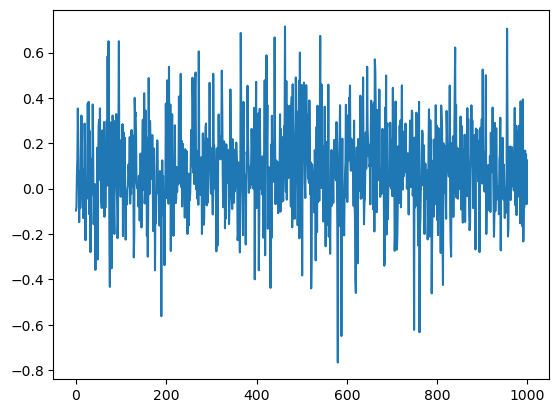

In [201]:
#sentiment plot
data2['sentiment'].plot()